# Lab 15: AVL Trees

## <font color=DarkRed>Your Exercise: Compare the performance of an unbalanced Binary Search Tree vs. a self-balancing AVL Tree</font>

Use the `BinarySearchTree`, `TreeNode`, `AVLTree`, and `AVLTreeNode` classes as found in our [class notebook on this topic](http://www.pas.rochester.edu/~rsarkis/csc162/_static/notebooks/14-Binary%20Search%20Trees/Binary%20Search%20and%20AVL%20Trees.ipynb).

The worst-case performance of both those structures is listed below.

| operation | Binary Search Tree |    AVL Tree    |
| --------- | ------------------ | -------------- | 
| put 	    | $O(n)$             | $O(log_2 n)$   |
| get 	    | $O(n)$             | $O(log_2 n)$   |
| in 	    | $O(n)$             | $O(log_2 n)$   |
| del 	    | $O(n)$             | $O(log_2 n)$   |


**Your task:** Do your best to test the run time complexity of these operations on these two types of trees. This means:

   * Concoting some set of data to input into the trees (perhaps my previous word examples)
   
   * Using timer objects
   
   * Plots

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct!*

### BinarySearchTree and TreeNode

In [244]:
class TreeNode:
    def __init__(self, key, val, left=None, right=None, parent=None):
        self.key = key
        self.payload = val
        self.left_child = left
        self.right_child= right
        self.parent = parent
        
    def __iter__(self):
        if self:
            if self.has_left_child():
                for elem in self.left_child:
                    yield elem
                    
            yield self.key
            
            if self.has_right_child():
                for elem in self.right_child:
                    yield elem
                    
    def has_left_child(self):
        return self.left_child
    
    def has_right_child(self):
        return self.right_child
    
    def is_left_child(self):
        return self.parent and self.parent.left_child is self
    
    def is_right_child(self):
        return self.parent and self.parent.right_child is self
    
    def is_root(self):
        return not self.parent
    
    def is_leaf(self):
        return not self.left_child and not self.right_child
    
    def has_any_children(self):
        return self.right_child or self.left_child
    
    def has_both_children(self):
        return self.right_child and self.left_child
    
    def replace_node_data(self, key, value, lc, rc):
        self.key = key
        self.payload = value
        self.left_child = lc
        self.right_child = rc
        
        if self.has_left_child():
            self.left_child.parent = self
            
        if self.has_right_child():
            self.right_child.parent = self
            
    def splice_out(self):
        if self.is_leaf():
            if self.is_left_child():
                self.parent.left_child = None
            else:
                self.parent.right_child = None
        elif self.has_any_children():
            if self.has_left_child():
                if self.is_left_child():
                    self.parent.left_child = self.left_child
                else:
                    self.parent.right_child = self.left_child
                    
                self.left_child.parent = self.parent
            else:  # has a right child
                if self.is_left_child():
                    self.parent.left_child = self.right_child
                else:
                    self.parent.right_child = self.right_child
                    
                self.right_child.parent = self.parent
                
    def find_successor(self):
        succ = None
        
        if self.has_right_child():
            succ = self.right_child.find_min()
        else:  # no right child? Then we work on left child
            if self.parent:  # it is an intermediate node
                if self.is_left_child():
                    succ = self.parent
                else:  # is a right child
                    self.parent.right_child = None
                    succ = self.parent.find_successor()
                    self.parent.right_child = self
        return succ
    
    
    def find_min(self):
        current = self
        
        while current.has_left_child():
            current = current.left_child

        return current

In [245]:
class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.size = 0
    
    def __len__(self):
        return self.length()
    
    def __iter__(self):
        return self.root.__iter__()
    
    def __setitem__(self, k, v):
        self.put(k, v)
  
    def __getitem__(self, k):
        return self.get(k)
    
    def __contains__(self, k):
        #if self._get(key, self.root):
        #    return True
        #else:
        #    return False
        
        return self._get(k, self.root) is not None

    def __delitem__(self, k):
        self.delete(k)
    
    def length(self):
        return self.size
    
    def put(self, key, val):
        if self.root:
            self._put(key, val, self.root)
        else:  # the tree is non-existient
            self.root = TreeNode(key, val)
            
        self.size += 1
        
    def _put(self, key, val, current_node):
        if key < current_node.key:
            if current_node.has_left_child():
                self._put(key, val, current_node.left_child)
            else:
                current_node.left_child = TreeNode(key, val, parent=current_node)
        else:
            if current_node.has_right_child():
                self._put(key, val, current_node.right_child)
            else:
                current_node.right_child = TreeNode(key, val, parent=current_node)
                
    def get(self, key):
        if self.root:
            res = self._get(key, self.root)
            if res:
                # return the value of our TreeNode with matching key
                return res.payload
            else:
                return None
        else:
            return None
        
    def _get(self, key, current_node):
        if not current_node:
            return None
        elif current_node.key == key:
            return current_node
        elif key < current_node.key:
            return self._get(key, current_node.left_child)
        else:
            return self._get(key, current_node.right_child)
        
    def delete(self, key):
        if self.size > 1:
            node_to_remove = self._get(key, self.root)
            if node_to_remove:
                self.remove(node_to_remove)
                self.size -= 1
            else:
                raise KeyError("Key not found in tree!")
        elif self.size == 1 and self.root.key == key:
            # tree is completely removed, since it was only one node
            self.root = None
            self.size -= 1
        else:
            raise KeyError("Key not found in tree!")
            
    def remove(self, current_node):
        if current_node.is_leaf():  # leaf
            #if current_node == current_node.parent.left_child:
            if current_node.is_left_child():   
                current_node.parent.left_child = None
            else:
                current_node.parent.right_child = None
        elif current_node.has_both_children():  # interior
            succ = current_node.find_successor()
            succ.splice_out()
            current_node.key = succ.key
            current_node.payload = succ.payload
        else:  # node has one child
            if current_node.has_left_child():
                if current_node.is_left_child():
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.left_child
                elif current_node.is_right_child():
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.left_child
                else:
                    current_node.replace_node_data(current_node.left_child.key,
                                                   current_node.left_child.payload,
                                                   current_node.left_child.left_child,
                                                   current_node.left_child.right_child)
            else:
                if current_node.is_left_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.right_child
                elif current_node.is_right_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.right_child
                else:
                    current_node.replace_node_data(current_node.right_child.key,
                                                   current_node.right_child.payload,
                                                   current_node.right_child.left_child,
                                                   current_node.right_child.right_child)   

### AVLTree and TreeNode

In [246]:
import requests

In [247]:
class AVLTreeNode(TreeNode):
    """A subclass of TreeNode"""
    def __init__(self, *args, **kwargs):
        # Initialize a TreeNode instance that we subclass from)
        super(AVLTreeNode, self).__init__(*args, **kwargs)
        self.balance_factor = 0

In [248]:
class AVLBinarySearchTree(BinarySearchTree):
    def put(self, key, val):
        if self.root:
            self._put(key, val, self.root)
        else:
            self.root = AVLTreeNode(key, val)
            
        self.size += 1
        
    def _put(self, key, val, current_node):
        if key < current_node.key:
            if current_node.has_left_child():
                self._put(key, val, current_node.left_child)
            else:
                current_node.left_child = AVLTreeNode(key, val, parent=current_node)
                self.update_balance(current_node.left_child)
        else:
            if current_node.has_right_child():
                self._put(key, val, current_node.right_child)
            else:
                current_node.right_child = AVLTreeNode(key, val, parent=current_node)
                self.update_balance(current_node.right_child)
                
    def update_balance(self, node):
        if node.balance_factor > 1 or node.balance_factor < -1:
            self.rebalance(node)
            return
        
        if node.parent is not None:
            if node.is_left_child():
                node.parent.balance_factor += 1
            elif node.is_right_child():
                node.parent.balance_factor -= 1
                
            if node.parent.balance_factor != 0:
                self.update_balance(node.parent)
                

    def rebalance(self, node):
        if node.balance_factor < 0:
            if node.right_child.balance_factor > 0:
                self.rotate_right(node.right_child)
                self.rotate_left(node)
            else:
                self.rotate_left(node)
        elif node.balance_factor > 0:
            if node.left_child.balance_factor < 0:
                self.rotate_left(node.left_child)
                self.rotate_right(node)
            else:
                self.rotate_right(node)


    def rotate_left(self, rot_root):
        new_root = rot_root.right_child
        rot_root.right_child = new_root.left_child
        
        if new_root.left_child is not None:
            new_root.left_child.parent = rot_root
        new_root.parent = rot_root.parent
        
        if rot_root.is_root():
            self.root = new_root
        else:
            if rot_root.is_left_child():
                rot_root.parent.left_child = new_root
            else:
                rot_root.parent.right_child = new_root
        
        new_root.left_child = rot_root
        rot_root.parent = new_root
        
        rot_root.balance_factor = (rot_root.balance_factor + 1 
                                   - min(new_root.balance_factor, 0))
        
        new_root.balance_factor = (new_root.balance_factor + 1
                                   + max(rot_root.balance_factor, 0))
        
    def rotate_right(self, rot_root):
        new_root = rot_root.left_child
        rot_root.left_child = new_root.right_child
        
        if new_root.right_child != None:
            new_root.right_child.parent = rot_root
        new_root.parent = rot_root.parent
        
        if rot_root.is_root():
            self.root = new_root
        else:
            if rot_root.is_left_child():
                rot_root.parent.left_child = new_root
            else:
                rot_root.parent.right_child = new_root
        
        new_root.right_child = rot_root
        rot_root.parent = new_root
        
        rot_root.balance_factor = (rot_root.balance_factor - 1 
                                   - max(new_root.balance_factor, 0))
        
        new_root.balance_factor = (new_root.balance_factor - 1
                                   + min(rot_root.balance_factor, 0))

# Testing the run time complexity

| operation | Binary Search Tree |    AVL Tree    |
| --------- | ------------------ | -------------- | 
| put 	    | $O(n)$             | $O(log_2 n)$   |
| get 	    | $O(n)$             | $O(log_2 n)$   |
| in 	    | $O(n)$             | $O(log_2 n)$   |
| del 	    | $O(n)$             | $O(log_2 n)$   |


In [249]:
import time
import random
from random import shuffle

In [250]:
def get_names(url):
    req = requests.get(url)
    lines = req.text.split("\n")
    names = []
    
    for line in lines:
        data = line.split()
        if len(data) == 4:
            names.append( (data[0], data[3]) )
            
    return names

In [251]:
names = get_names("https://www2.census.gov/topics/genealogy/1990surnames/dist.female.first")

### BST

In [252]:
name_tree_bst = BinarySearchTree()

BST_put_time=[]   
BST_get_time=[]
BST_in_time=[]
BST_del_time=[]

    
for name, rank in names:
    
    name_tree_bst[int(rank)] = name
    
    n = random.randint(1,len(name_tree_bst))
    
    start = time.perf_counter()
    name_tree_bst.put(n, 'N')
    end = time.perf_counter()
    BST_put_time.append(end-start)
    
    start = time.perf_counter()
    name_tree_bst.get(n)
    end = time.perf_counter()
    BST_get_time.append(end-start)
    
    start = time.perf_counter()
    n in name_tree_bst
    end = time.perf_counter()
    BST_in_time.append(end-start)
    
    start = time.perf_counter()
    name_tree_bst.delete(n)
    end = time.perf_counter()
    BST_del_time.append(end-start)
       

### AVL

In [253]:
name_tree_avl = AVLBinarySearchTree()

AVL_put_time=[]   
AVL_get_time=[]
AVL_in_time=[]
AVL_del_time=[]

    
for name, rank in names:
    name_tree_avl[int(rank)] = name
    
    n = random.randint(1,len(name_tree_avl))
    
    start = time.perf_counter()
    name_tree_avl.put(n, 'N')
    end = time.perf_counter()
    AVL_put_time.append(end-start)
    
    start = time.perf_counter()
    name_tree_avl.get(n)
    end = time.perf_counter()
    AVL_get_time.append(end-start)
    
    start = time.perf_counter()
    n in name_tree_avl
    end = time.perf_counter()
    AVL_in_time.append(end-start)
    
    start = time.perf_counter()
    name_tree_avl.delete(n)
    end = time.perf_counter()
    AVL_del_time.append(end-start)
     

# Plots

In [254]:
import matplotlib.pyplot as plt

In [255]:
N1 = []
for i in range(0,len(BST_put_time)):
    N1.append(i)
    
N2 = []
for i in range(0,len(AVL_put_time)):
    N2.append(i)


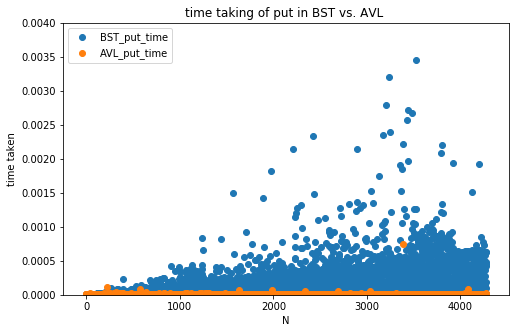

In [256]:
plt.figure(figsize=(8,5))
plt.title("time taking of put in BST vs. AVL ")
plt.scatter(N1, BST_put_time, label = 'BST_put_time')
plt.scatter(N2, AVL_put_time, label = 'AVL_put_time')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.ylim(0,0.004)
plt.show()

In [257]:
N1 = []
for i in range(0,len(BST_get_time)):
    N1.append(i)
    
N2 = []
for i in range(0,len(AVL_get_time)):
    N2.append(i)


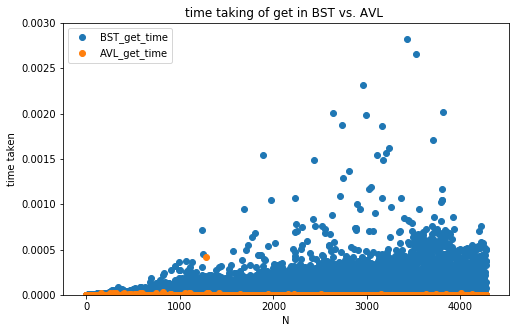

In [258]:
plt.figure(figsize=(8,5))
plt.title("time taking of get in BST vs. AVL ")
plt.scatter(N1,BST_get_time , label = 'BST_get_time')
plt.scatter(N2,AVL_get_time, label = 'AVL_get_time')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.ylim(0,0.003)
plt.show()

In [259]:
N1 = []
for i in range(0,len(BST_in_time)):
    N1.append(i)
    
N2 = []
for i in range(0,len(AVL_in_time)):
    N2.append(i)


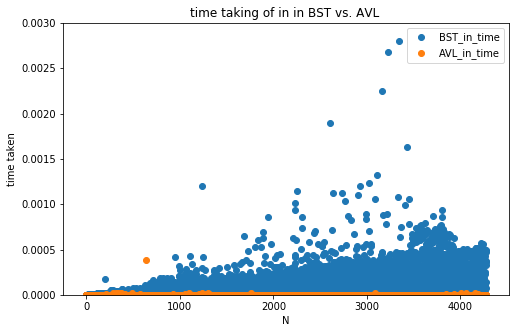

In [260]:
plt.figure(figsize=(8,5))
plt.title("time taking of in in BST vs. AVL ")
plt.scatter(N1, BST_in_time , label = 'BST_in_time')
plt.scatter(N2, AVL_in_time, label = 'AVL_in_time')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.ylim(0,0.003)
plt.show()

In [261]:
BST_del_time2 = []
for i in range(0,4275, 171):
    m= BST_del_time.pop(i)
    BST_del_time2.append(m)

AVL_del_time2 = []
for i in range(0,4275, 171):
    m= AVL_del_time.pop(i)
    AVL_del_time2.append(m)

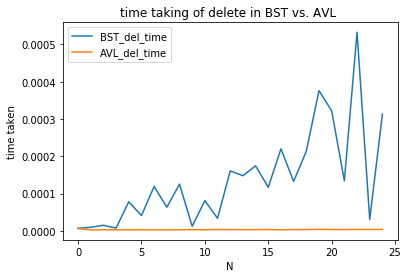

In [262]:
plt.title("time taking of delete in BST vs. AVL ")
plt.plot(BST_del_time2 , label = 'BST_del_time')
plt.plot(AVL_del_time2, label = 'AVL_del_time')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.show()